# Bevezetés a Machine learning, deep learning világába

Mi az a Machine learning avagy gépi tanulás? Hogyan kapcsolódik ez az egész az AI(Artificial Intelligence) azaz a mesterséges inteligenciához? 

A gépi tanulás alatt arra gondolunk, hogy nem általunk deklarált algoritmusok segítségével oldunk meg egy feladatot, hanem példák alapján azt a "gép" megtanulja.

Nézzük meg a lenti táblázatot, ami a Kaliforniai házak árazását tanulmányozza.
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [ ]:
from sklearn import datasets
import pandas as pd


def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    print(sklearn_dataset['DESCR'])

    return df

df = sklearn_to_df(datasets.fetch_california_housing())
df.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


A feladat, hogy a rendelkezésre álló több ezer mintából, ahol pl. a szobák száma, vagy a környék populációja, vagy éppen elhelyezkedése szerepel. A cél hogy ezekből az adatokból az árat meghatározzuk, olyan ingatlanok esetében, amik **nem is szerepelnek ebben a táblázatban**!

In [ ]:
from sklearn.model_selection  import train_test_split

y = df['target']
#As we know, iloc is used to slice the array by index number. Here this is the matrix of 
#independent variables.
X = df.iloc[:,0:8]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )

(14448, 8) (6192, 8) (14448,) (6192,)


LinearRegression()

## Evaluating the Model Results
- You have fit a model. 
- You can now store this model, save the object to disk, or evaluate it with different outcomes. 
- Trained regression objects have coefficients (`coef_`) and intercepts (`intercept_`) as attributes. 
- R-Squared is determined from the `score` method of the regression object.
- For Regression, we are going to use the coefficient of determination as our way of evaluating the results, [also referred to as R-Squared](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [ ]:
print('labels\n',X.columns)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

labels
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
Coefficients: 
 [ 4.46773975e-01  9.18409990e-03 -1.18116775e-01  6.42290879e-01
 -9.37026507e-06 -4.08535934e-03 -4.09023312e-01 -4.23419564e-01]
Intercept: 
 -36.01222888765239
R2 for Train) 0.6112941337977225
R2 for Test (cross validation) 0.5926087785518774


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, y_train, cv=8) 
print("R2:", scores, "\n R2_avg: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: [0.62103167 0.59662386 0.61043628 0.6056347  0.60150524 0.58696177
 0.60222179 0.62946324] 
 R2_avg: 0.61 (+/- 0.03)


In [ ]:
X_test['target_REG']=lm.predict(X_test)
X_test['target'] = y_test
X_test[['target', 'target_REG']].head()

,target,target_REG
14740,1.369,2.270267
10101,2.413,2.790599
20566,2.007,1.909848
2670,0.725,1.031605
15709,4.600,2.980156


Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

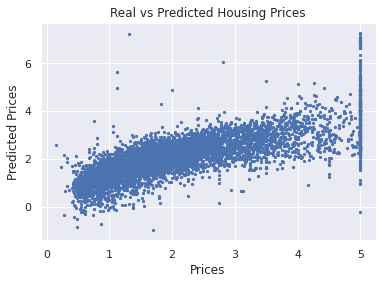

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( X_test['target'], X_test['target_REG'], s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

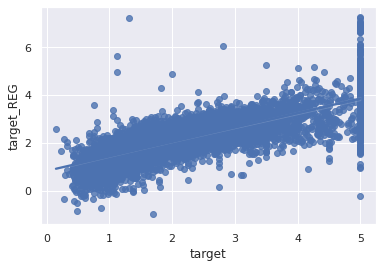

In [ ]:
#Let's make it look pretty with pickle
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="target", y="target_REG", data=X_test[['target','target_REG']])

# Simplest linear regression - predicting X

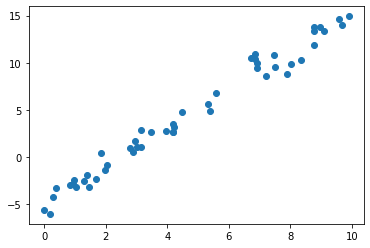

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

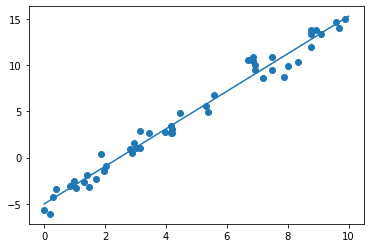

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
      

--2022-01-07 02:33:59--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2022-01-07 02:33:59 (5.06 MB/s) - ‘titanic.csv’ saved [60302/60302]



# Titanic survival dataset

Itt pl. targetnek nevezhetjük a "survived" oszlopot és hasonlóan test és training adatokat képezve, megvizsgálhatnánk hogy kik élték túl a katasztrófát. Vegyük észre, hogy itt nem csak arra tudunk választ adni, hogy ha valaki lekéste volna a hajót - túl élte volna, hanem hogy van e valami minta, ami alapján ez nagy pontossággal megmondható és mik azok a tényezők?

A megoldáshoz nem regression-t kell használni, mert nem egy értéket, hanem egy osztályt keresünk. Ráadásul bináris, azaz egy 2 elemű osztályba sorolás a feladat.
Ehhez a megoldáshoz használhatunk decesionTree-t

Az összes ilyen feladathoz úgy állunk hozzá, függetlenül az algoritmustól, amit használni fogunk, hogy a hiányzó adatokat értelmesen pótoljuk a hibásakat lehetőleg javítjuk. A nem releváns oszlopokat töröljük. Itt pl ilyen a "Name"(név) oszlop. 

A táblázatos adatokat alakítgatni kell. Lehetőleg számokra.

Az életkor, vagy pl. súly olyan adat, amit ha összeszorzunk kivonunk - értelmes lehet. ezeket "continous value"-knak hívjuk. De pl. egy Zip kódot vagy ID-t nem érdemes szorozgatni.

A dátum is különleges szám - ebből érdemes generálni: napokat, hónapokat, hétvégéket, vagy munkanapokat stb.

A szöveges adatokat, ahol lehet kategorizálni kell pl. kicsi, nagy, legnagyobb - 1, 2, 3

(Vagy akár one-hot encodeing vagy embedding, erről majd később)


```
Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
```

In [7]:
titanic = pd.read_csv("/content/titanic.csv")

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Linea regression, decesion tree, SVM, Naive Bayes és még sok más algoritmus család létezik az ilyen és hasonló feladatok megoldására!
Ezek közül mi egyikkel sem foglalkozunk!

Mi neurális hálókat fogunk használni az elkövetkezendő feladatok megoldásához, az is kiderül hamarosan hogy miért.

# MNIST Hand written digits

Az MNIST az egyik leghíresebb dataset.
http://yann.lecun.com/exdb/mnist/
https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/

AMit most szándékosan, csv formátumban töltöttem be egy táblázatba. A dataset 28x28 pixeles képeket tartalmaz. A 28x28 pixel mindegyike egy 0..255 között értéket rejt, ami meghatározza a pixel "fényességét". A 0 érték feketét a 255 fehéret jelent.
Ezt képzeljük el mint egy táblázatot, ahol 28x28=784db oszlop van. A 785. oszlop pedig tartalmazza a "targetet", (label). A feladat hasonló a 784 oszlop alapján egy 10 elemű osztályba kell sorolni a képeket.

A pixelek már számok, nagyon nem is kell már vele mit kezdeni.

Általában akkor használunk Neurális hálókat egy feladat megoldásához, amikor nagyon sok "oszlopunk van". Az oszlopokat szokták attributumnak, vagy feature-nek is nevzni. De lehet rá dimenzióként is hivatkozni.

Korábban különböző clustering technikákkal, "dimenzió redukciókkal" (PCA), próbálták a nagy dimenziójú adatokat kezelni. Az előbb említett technikák nem haltak ki teljesen, sok feladatban meg van még a létjogosultságuk, de ezen a kurzuson mi csak a neurális hálókra koncentrálunk.



In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/mnist_test.csv -O /tmp/mnist_train_small.csv

--2022-01-05 23:02:33--  https://storage.googleapis.com/mledu-datasets/mnist_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [application/octet-stream]
Saving to: ‘/tmp/mnist_train_small.csv’

/tmp/mnist_train_sm 100%[===================>]  17.44M  86.0MB/s    in 0.2s    

2022-01-05 23:02:34 (86.0 MB/s) - ‘/tmp/mnist_train_small.csv’ saved [18289443/18289443]



In [ ]:
mnist_dataframe = pd.read_csv("/tmp/mnist_train_small.csv", sep=",")

In [ ]:
mnist_dataframe.iloc[1, 1:785]

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Name: 1, Length: 784, dtype: int64

In [ ]:
mnist_dataframe.iloc[:,200:300]

,0.199,0.200,0.201,84,185,159,151,60,36,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222,0.223,222,254,254.1,254.2,254.3,241,198,198.1,198.2,...,114,72,114.1,163,227,254.4,225,254.5,254.6,254.7,250,229,254.8,254.9,140,0.236,0.237,0.238,0.239,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.252,17,66,14,67.1,67.2,67.3,59,21
0,0,0,0,0,77,251,210,25,0,0,0,122,248,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,18,0,0,0,0,209,...,0,0,0,0,0,0,117,247,253,198,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,247,253,231,63,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,45,244,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,202,223,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,254,216,0,0
2,0,0,0,0,0,0,0,110,190,251,251,251,253,169,109,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,251,251,251,251,...,0,0,182,255,253,253,253,253,234,222,253,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,221,253,251,251,251,147,77,62,128,251
3,0,0,0,0,0,0,4,195,231,0,0,0,0,0,0,0,96,210,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69,252,134,0,0,0,...,0,45,236,217,12,0,0,0,0,0,0,0,192,252,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,247,53,0,0,0,0,0,0,0,18
4,0,0,0,0,0,0,0,0,0,0,0,0,81,254,254,165,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,53,254,254,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,254,254,180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,64,255,255,255,255,255,255,255,128,128,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,255,255,255,255,191,128,0,0,...,255,255,255,128,0,0,0,0,0,0,255,255,255,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,128,0,0,0,0,0,0,0,64,255,255
9995,0,0,0,58,240,254,254,254,254,254,254,254,254,249,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,246,254,254,237,160,130,229,254,...,183,222,103,50,0,0,77,254,254,250,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207,254,254,251,68,0
9996,0,0,0,0,0,0,0,2,116,254,218,32,0,0,0,54,238,254,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,254,254,74,0,...,0,0,31,216,254,250,67,0,0,0,154,254,254,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,168,254,254,189,0,0,0,62,236,254
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,10,78,...,0,0,0,0,123,238,254,235,159,76,111,76,115,169,169,238,254,254,254,254,0,0,0,0,0,0,0,0,0,0,0,71,252,254,254,254,254,254,254,254


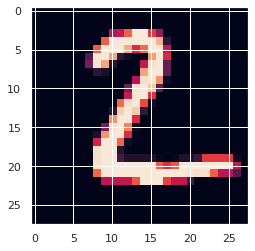

In [ ]:
import numpy as np

array = np.array(mnist_dataframe.iloc[0, 1:785])

array.shape
plt.imshow(array.reshape(28,28))